In [62]:
import requests
import pandas as pd
from datetime import date
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
def get_currency_rates (from_currency, to_currency):
    '''
    Function to get exchange rates for the last seven days
    apikey - API key that you can get on fixer.io
    from_currency, to_currency - three-letter currency codes of your preferred base currency (see fixer.io API docs at https://fixer.io/documentation)
    end_date - today date, example: 2022-12-17
    start_date - date seven days before
    '''
    headers= {
        "apikey": "***"
            }
    end_date = date.today().strftime('%Y-%m-%d')
    start_date = (date.today()-timedelta(days=7)).strftime('%Y-%m-%d')
    query_string = f"?start_date={start_date}&end_date={end_date}&base={from_currency}&symbols={to_currency}"
    url = "https://api.apilayer.com/fixer/timeseries" + query_string
    return requests.get(url=url, headers=headers).json()
    

Вызываем два раза функцию

In [48]:
usd_eur = get_currency_rates('USD', 'EUR')

In [49]:
rub_eur = get_currency_rates('RUB', 'EUR')

Преобразуем полученные словари в датафреймы, транспонируем, чтобы даты шли по строкам, и сразу сджойним в одну таблицу.

In [54]:
df_usd_eur = pd.DataFrame(usd_eur['rates']).T.rename(columns={'EUR':'USD-EUR'})
df_rub_eur = pd.DataFrame(rub_eur['rates']).T.rename(columns={'EUR':'RUB-EUR'})
df_merged = df_usd_eur.join(df_rub_eur)
df_merged

,USD-EUR,RUB-EUR
2022-12-10,0.94815,0.015167
2022-12-11,0.95041,0.015203
2022-12-12,0.94864,0.015140
2022-12-13,0.94106,0.014887
2022-12-14,0.93665,0.014466
2022-12-15,0.93995,0.014539
2022-12-16,0.94365,0.014546
2022-12-17,0.94345,0.014543


Сохраняем таблицу в csv локально

In [56]:
df_merged.to_csv('currency_rates.csv')

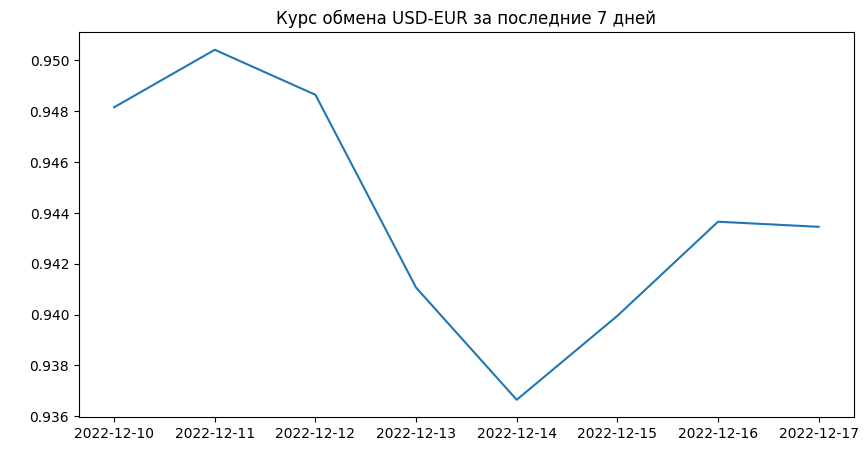

In [71]:
plt.figure(figsize=(10, 5))
plt.ylabel(' ')
ax=sns.lineplot(df_merged['USD-EUR'])\
    .set_title('Курс обмена USD-EUR за последние 7 дней')


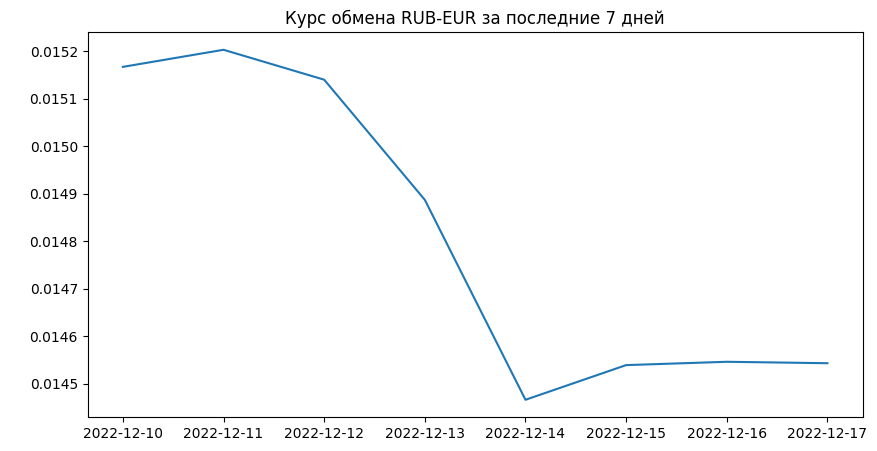

In [72]:
plt.figure(figsize=(10, 5))
plt.ylabel(' ')
ax=sns.lineplot(df_merged['RUB-EUR'])\
    .set_title('Курс обмена RUB-EUR за последние 7 дней')